In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Tìm hiểu seaborn

In [2]:
# in seaborn xem dataset
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
# Chọn thư data 'tips' nguyên cứu:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

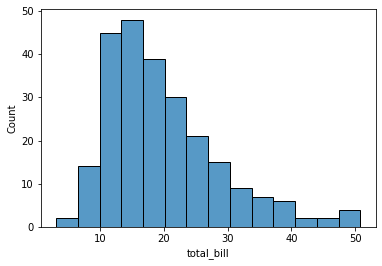

In [4]:
sns.histplot(data = tips['total_bill'])

In [5]:
# Xem giá trị tổng đơn hàng theo chiều giảm
tips['total_bill'].value_counts().sort_values(ascending= False)

13.42    3
10.34    2
13.81    2
7.25     2
10.33    2
        ..
11.02    1
27.28    1
11.38    1
17.07    1
26.88    1
Name: total_bill, Length: 229, dtype: int64

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

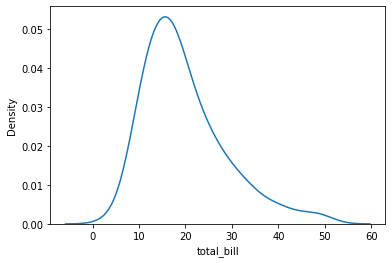

In [6]:
# Vẽ biểu đồ KDE plot
sns.kdeplot(data=tips['total_bill'])

Styling, apply default theme (thay đổi nền cho đồ thị)

In [7]:
sns.set_theme()

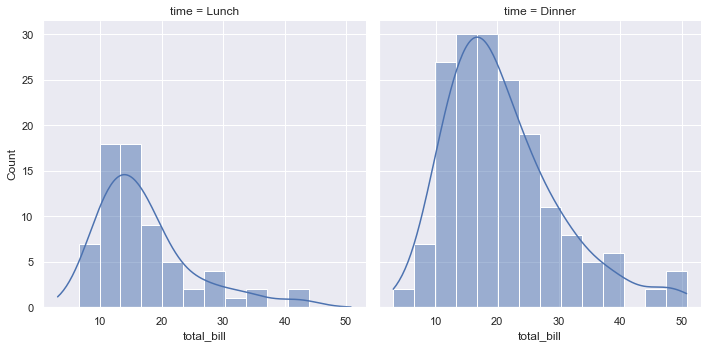

In [8]:
# Dislot
sns.displot(data = tips, x= "total_bill", kde = True, col="time" )
# displot cho phép kết hợpp kde chung 1 biểu đồ
# col="time" : thêm 1 biểu đồ thời gian

Bar plot

In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


So sánh nam và nữ ai trả tiền tip nhiều hơn

<AxesSubplot:xlabel='sex', ylabel='tip'>

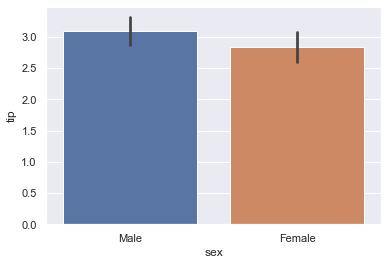

In [10]:
sns.barplot(data=tips, x='sex', y='tip', estimator= np.mean) 
# estimator: giá trị Ước lượng | Giá trị này ko có vẫn đúng theo trung bình

Count plot

In [11]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

Biểu diễn đồ thị (tips['sex'].value_counts())

<AxesSubplot:xlabel='sex', ylabel='count'>

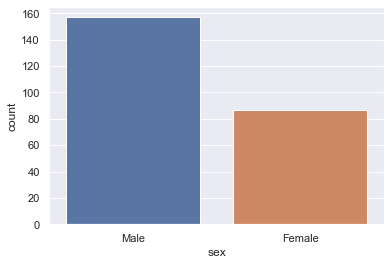

In [12]:
sns.countplot(data= tips, x='sex')

Box plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

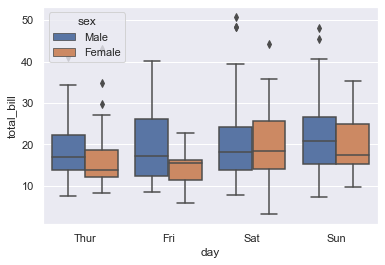

In [13]:
sns.boxplot(data= tips, x= 'day', y= 'total_bill', hue= "sex")
# hue: màu sắc, thêm vào sex để xem nam hay nữ trả nhiều hơn

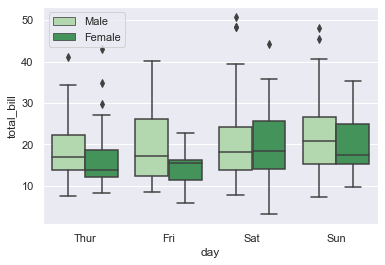

In [14]:
sns.boxplot(data= tips, x= 'day', y= 'total_bill', hue= "sex", palette= "Greens")

plt.legend(loc=0) # Bỏ ghi chú sex

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Facet Grid: Biểu đổ tương quan giữa các giá trị chọn

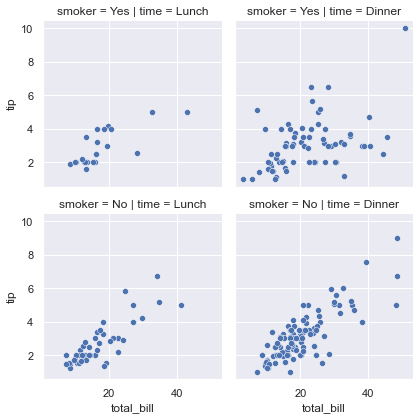

In [16]:
tips_fg = sns.FacetGrid(data= tips, row= 'smoker', col= 'time')

# Gán class bằng biến tips_fg, vì tips là dataFrame sẽ ko sử dụng dc hàm map
tips_fg.map(sns.scatterplot, 'total_bill','tip')


Ghi chú: 
    + Nhìn vào biểu đồ trên ta thấy. Buổi trưa (tại cột đầu tiên) người ko hút thuốc đặt hàng nhiều hơn.
    + Số lượng đặt hàng nhiều thì tổng giá trị lớn, đồng thờo tiền tip cũng tăng theo tỷ lệ


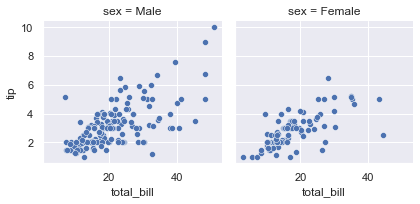

In [17]:
# Để đơn giản hóa ta dùng lại biểu đồ chỉ vẽ cột giới tính sau
tips_sex = sns.FacetGrid(data= tips, col='sex')
tips_sex.map(sns.scatterplot,'total_bill','tip')

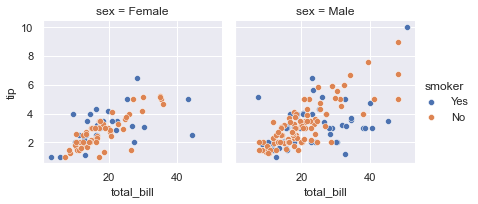

In [18]:
# Biểu diễn lại cho đầy đủ hơn
tips_sex = sns.FacetGrid(data= tips, col='sex', hue='smoker',
                        col_order=["Female", 'Male'])
# col_order: tahy đổi thứ tự

tips_sex.map(sns.scatterplot,'total_bill','tip')

# chú thích màu (plt.legend('smoker'))
tips_sex.add_legend()

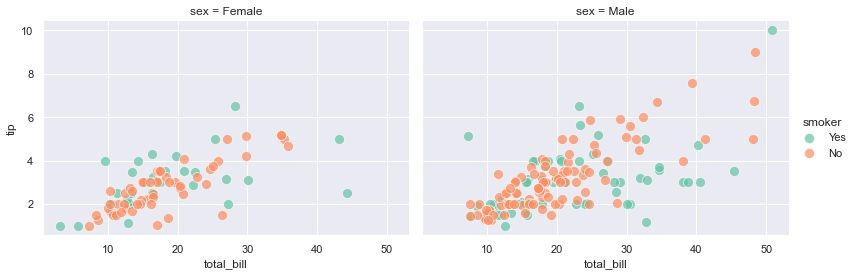

In [19]:
# Bước 3: Tô lại cho đẹp
tips_sex = sns.FacetGrid(data= tips, col='sex', hue='smoker',
                        palette='Set2',
                        col_order=["Female", 'Male'],
                        height=4, aspect= 1.4)
# col_order: tahy đổi thứ tự
# palette='Set2': Thay đổi màu chú thích smoker = yes
# height=4: thay đổi chiều cao; aspect= 1.4 : tăng độ rộng

# kws=dict(s=100, )
tips_sex.map(sns.scatterplot,'total_bill','tip', s=100, alpha= 0.7)
# s=100: tô viền tròn to hơn
# alpha= 0.7: độ trong suốt giữa các hình tròn đè lên

# chú thích màu (plt.legend('smoker'))
tips_sex.add_legend()

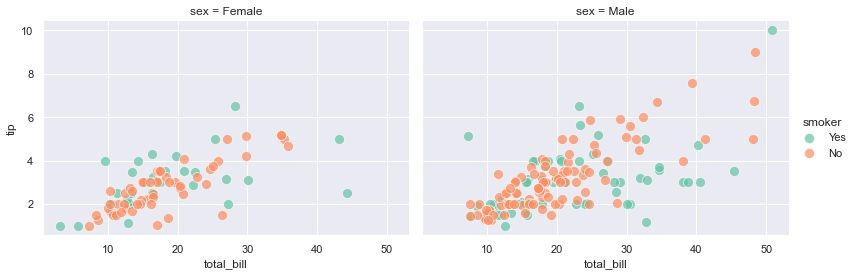

In [20]:
# Bước 4: Viết hàm đưa tham số vào
kws = dict(s=100, alpha= 0.7)

tips_sex = sns.FacetGrid(data= tips, col='sex', hue='smoker',
                        palette='Set2',
                        col_order=["Female", 'Male'],
                        height=4, aspect= 1.4)
# col_order: tahy đổi thứ tự
# palette='Set2': Thay đổi màu chú thích smoker = yes
# height=4: thay đổi chiều cao; aspect= 1.4 : tăng độ rộng

# kws=dict(s=100, )
tips_sex.map(sns.scatterplot,'total_bill','tip',  **kws)
# s=100: tô viền tròn to hơn
# alpha= 0.7: độ trong suốt giữa các hình tròn đè lên
"**kws : là hàm đưa vào"
# chú thích màu (plt.legend('smoker'))
tips_sex.add_legend()

Joint plot

In [22]:
# Tìm hiểu về Dataset chim cánh cụt
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [23]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Giải thích dữ liệu penguins:
 + species: giống loài
 + island : hoàn đảo
 + bill_length_mm: chiều dài mỏ
 + bill_depth_mm: Dày mỏ
 + flipper_length_mm : Chiều dài phần lội nước
 + body_mass_g: Khối lượng thân

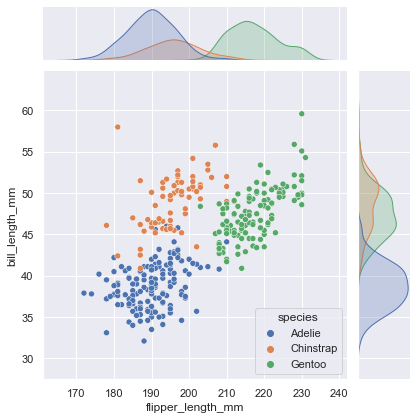

In [30]:
penguins_df = sns.jointplot(data= penguins, x= 'flipper_length_mm', y= 'bill_length_mm', hue= 'species')

# penguins_df.add_legend()

Tìm hiểu hàm: Pair plot

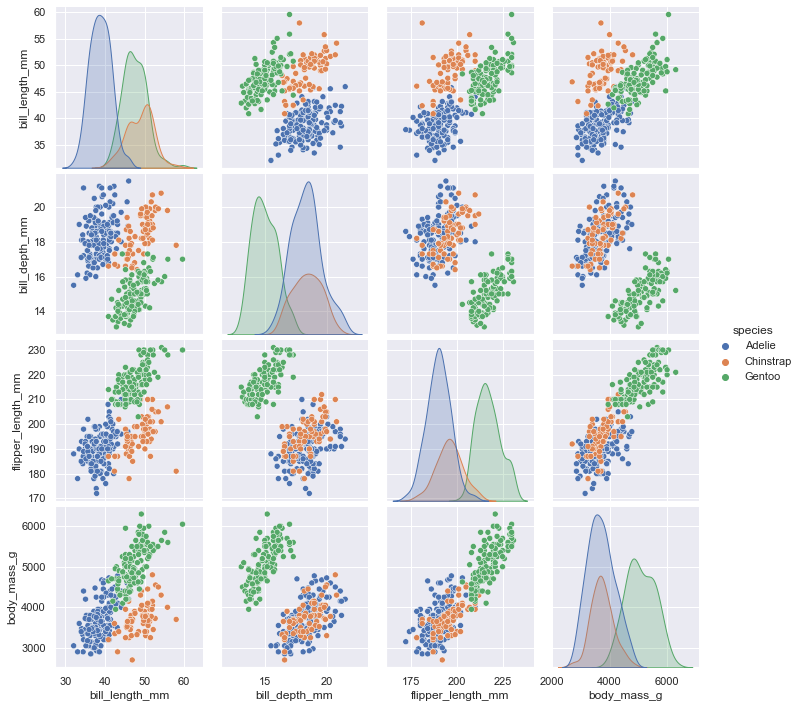

In [36]:
sns.pairplot(data= penguins, hue='species')

Tìm hiểu về; Heatmaps

In [38]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# passengers: Hành khách

Thay đổi dạng table dataFrame, bằng pd.pivot_table

In [39]:
flights_df = pd.pivot_table(data= flights, columns='year', index= 'month', values='passengers')
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Vẽ biểu đồ nhiệt Heatmaps tìm sự tương quan dữ liệu

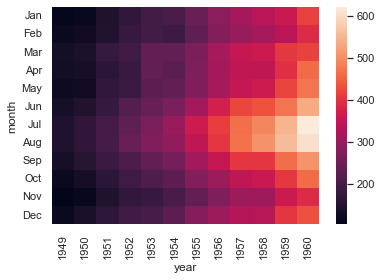

In [42]:
sns.heatmap(data= flights_df)

<AxesSubplot:xlabel='year', ylabel='month'>

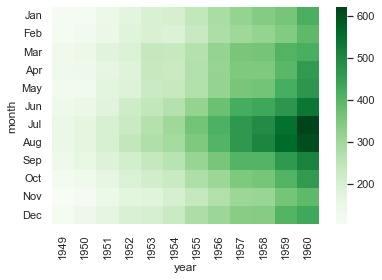

In [44]:
# Thay đổi màu
sns.heatmap(data= flights_df, cmap= 'Greens')

"Giải thích về biểu đồ khi nhìn vào"
 + Năm 1949: Rất ít hành khách. 
 + Các năm về sau đông hành khách
 + Tháng 7, 8: Đông hành khách nhất, tức là thời điểm đi du lịch đông nhất Châu Âu

'linewidths: độ dày của line'

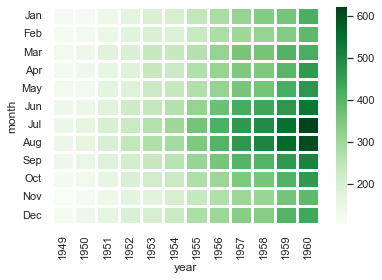

In [48]:
# Trang trí cho đễ nhìn
sns.heatmap(data= flights_df, cmap= 'Greens', linecolor= 'White', linewidths=1.4)
"linecolor: màu phân cách các ô"
"linewidths: độ dày của line"